In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
#global_temp_country = pd.read_csv('/home/dgorrell/Downloads/GlobalLandTemperaturesByCountry.csv')
global_temp_country = pd.read_csv('/home/dgorrell/Downloads/FAOSTAT_data_10-4-2019.csv')

In [4]:
global_temp_country

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1961,1961,hg/ha,15190,Fc,Calculated data
1,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1962,1962,hg/ha,15190,Fc,Calculated data
2,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1963,1963,hg/ha,15190,Fc,Calculated data
3,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1964,1964,hg/ha,17273,Fc,Calculated data
4,QC,Crops,2,Afghanistan,5419,Yield,27,"Rice, paddy",1965,1965,hg/ha,17273,Fc,Calculated data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,QC,Crops,181,Zimbabwe,5419,Yield,27,"Rice, paddy",2013,2013,hg/ha,22581,Fc,Calculated data
6585,QC,Crops,181,Zimbabwe,5419,Yield,27,"Rice, paddy",2014,2014,hg/ha,22647,Fc,Calculated data
6586,QC,Crops,181,Zimbabwe,5419,Yield,27,"Rice, paddy",2015,2015,hg/ha,22758,Fc,Calculated data
6587,QC,Crops,181,Zimbabwe,5419,Yield,27,"Rice, paddy",2016,2016,hg/ha,22817,Fc,Calculated data


In [5]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Area'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Area'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Area'] == 
                                               country]['Value'].mean())
# We're taking the log of the mean_temp, which is really yield

mean_temp = np.log10(mean_temp)
    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# yieldValce')
            )
       ]

layout = dict(
    title = 'Average Yeield in Countires',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
print(fig)
py.iplot(fig, validate=False, filename='worldmap')

{'data': [{'type': 'choropleth', 'locations': array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Azerbaijan', 'Bangladesh', 'Belize', 'Benin',
       'Bhutan', 'Bolivia (Plurinational State of)', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Cuba', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia', 'Fiji',
       'French Guiana', 'Gabon', 'Gambia', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran (Islamic Republic of)',
       'Iraq', 'Italy', 'Jamaica', 'Japan', 

(array([ 3.,  6., 11., 10., 21., 22., 19., 17., 13.,  5.]),
 array([3.88671034, 3.98647698, 4.08624362, 4.18601026, 4.2857769 ,
        4.38554355, 4.48531019, 4.58507683, 4.68484347, 4.78461011,
        4.88437675]),
 <a list of 10 Patch objects>)

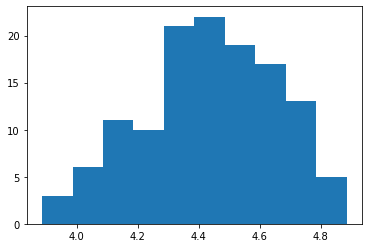

In [6]:
plt.hist(mean_temp)

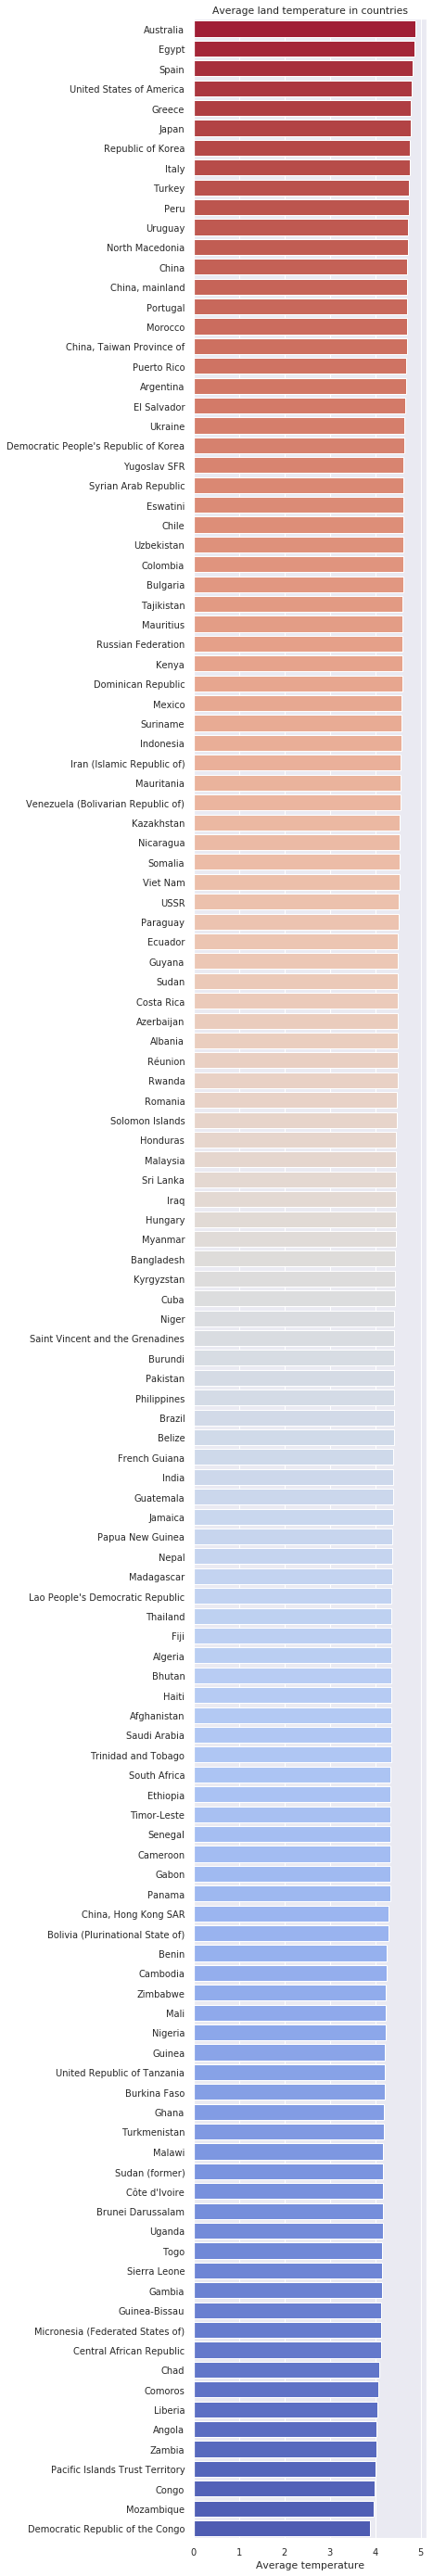

In [7]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [8]:
global_temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv')

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='year'),
    yaxis=dict(title='Average Temperature, °C'),
    title='Average land temperature in world',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [9]:
#Let's create a Streaming in Plotly (here, alas, does not work, so commented out)
#stream_tokens = tls.get_credentials_file()['stream_ids']
#token =  stream_tokens[-1]
#stream_id = dict(token=token, maxpoints=60)

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')